In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler

In [35]:
df = pd.read_csv('DXG-Historical-Data.csv')
df

,Unnamed: 0,Date,Price
0,0,2017-01-03,6066.50
1,1,2017-01-04,6166.40
2,2,2017-01-05,6091.50
3,3,2017-01-06,6141.40
4,4,2017-01-07,6116.45
...,...,...,...
2702,2702,2024-05-28,16800.00
2703,2703,2024-05-29,16850.00
2704,2704,2024-05-30,16850.00
2705,2705,2024-05-31,16800.00


In [36]:
df = df.reset_index()['Price']
df

0        6066.50
1        6166.40
2        6091.50
3        6141.40
4        6116.45
          ...   
2702    16800.00
2703    16850.00
2704    16850.00
2705    16800.00
2706    16770.00
Name: Price, Length: 2707, dtype: float64

In [37]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))
print(df.shape)

(2707, 1)


In [38]:
#Split train:test 7:3
train_size_7_3 = int(0.7 * len(df))
test_size_7_3 = len(df) - train_size_7_3

train_data_7_3 = df[:train_size_7_3]
test_data_7_3 = df[train_size_7_3:]

In [39]:
#Split train:test 8:2
train_size_8_2 = int(0.8 * len(df))
test_size_8_2 = len(df) - train_size_8_2

train_data_8_2 = df[:train_size_8_2]
test_data_8_2 = df[train_size_8_2:]

In [40]:
#Split train:test 9:1
train_size_9_1 = int(0.9 * len(df))
test_size_9_1 = len(df) - train_size_9_1

train_data_9_1 = df[:train_size_9_1]
test_data_9_1 = df[train_size_9_1:]

In [41]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [42]:
time_step = 100

x_train_7_3, y_train_7_3 = create_dataset(train_data_7_3, time_step)
x_test_7_3, y_test_7_3 = create_dataset(test_data_7_3, time_step)

x_train_8_2, y_train_8_2 = create_dataset(train_data_8_2, time_step)
x_test_8_2, y_test_8_2 = create_dataset(test_data_8_2, time_step)

x_train_9_1, y_train_9_1 = create_dataset(train_data_9_1, time_step)
x_test_9_1, y_test_9_1 = create_dataset(test_data_9_1, time_step)

In [43]:
def forecast_future_days(model, test_data, time_step, pred_days):
    x_input = test_data[len(test_data)-time_step:].reshape(1,-1)
    temp_input = list(x_input[0].tolist())
    xgb_output = []

    for i in range(pred_days):
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[1:])
            x_input = x_input.reshape(1, -1)

            yhat = model.predict(x_input)
            print("{} day output {}".format(i, yhat))

            temp_input.extend(yhat.tolist())
            temp_input = temp_input[1:]

            xgb_output.extend(yhat.tolist())
        else:
            yhat = model.predict(x_input)
            print("{} day output {}".format(i, yhat))

            temp_input.extend(yhat.tolist())
            xgb_output.extend(yhat.tolist())

    return xgb_output

## 7:3 ratio

In [44]:
#Build model
model_7_3 = XGBRegressor(base_score=0.5,
                    booster='gbtree',
                    n_estimators=1500,
                    early_stopping_rounds=50,
                    objective='reg:squarederror',
                    max_depth=3,
                    learning_rate=0.01)

In [45]:
model_7_3.fit(x_train_7_3, y_train_7_3, eval_set=[(x_test_7_3, y_test_7_3)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
y_pred_7_3 = model_7_3.predict(x_test_7_3)
y_pred_7_3

array([0.39489928, 0.40612245, 0.40092778, 0.3725469 , 0.35434845,
       0.37126437, 0.3649377 , 0.35266346, 0.35267255, 0.34865156,
       0.35307035, 0.3484876 , 0.34979293, 0.34746364, 0.33887875,
       0.34695062, 0.34976885, 0.32797238, 0.33952457, 0.3441472 ,
       0.33295524, 0.33821505, 0.33982715, 0.3537609 , 0.34274617,
       0.36429828, 0.36015508, 0.35425323, 0.3549322 , 0.34890127,
       0.34708458, 0.36594227, 0.36943966, 0.360837  , 0.36238274,
       0.36171448, 0.36206377, 0.37382424, 0.40545255, 0.4329323 ,
       0.43144846, 0.40420526, 0.40251276, 0.46953845, 0.4679829 ,
       0.46705407, 0.46953845, 0.46953845, 0.46953845, 0.47231036,
       0.47231036, 0.46630743, 0.49015367, 0.49791655, 0.497141  ,
       0.4616329 , 0.45917743, 0.48678192, 0.48678192, 0.52513623,
       0.52559334, 0.5259626 , 0.508984  , 0.5225348 , 0.5168784 ,
       0.5495797 , 0.5240205 , 0.5664615 , 0.5596868 , 0.57752395,
       0.5805582 , 0.53302187, 0.53504395, 0.5346411 , 0.54671

In [49]:
#Forecast 30 days
forecast_30days_7_3 = forecast_future_days(model_7_3, test_data_7_3, time_step, 30)
#Forecast 60 days
forecast_60days_7_3 = forecast_future_days(model_7_3, test_data_7_3, time_step, 60)
#Forecast 90 days
forecast_90days_7_3 = forecast_future_days(model_7_3, test_data_7_3, time_step, 90)

0 day output [0.26259217]
1 day output [0.26259217]
2 day output [0.26259217]
3 day output [0.26259217]
4 day output [0.26259217]
5 day output [0.2624644]
6 day output [0.26259217]
7 day output [0.26259217]
8 day output [0.2624644]
9 day output [0.2624644]
10 day output [0.2624644]
11 day output [0.2624644]
12 day output [0.2624644]
13 day output [0.2624644]
14 day output [0.2624644]
15 day output [0.2624644]
16 day output [0.2624644]
17 day output [0.2624644]
18 day output [0.2624644]
19 day output [0.26244253]
20 day output [0.26244253]
21 day output [0.26244253]
22 day output [0.26244253]
23 day output [0.26244253]
24 day output [0.26244253]
25 day output [0.26244253]
26 day output [0.26244253]
27 day output [0.26244253]
28 day output [0.26244253]
29 day output [0.26244253]
0 day output [0.26259217]
1 day output [0.26259217]
2 day output [0.26259217]
3 day output [0.26259217]
4 day output [0.26259217]
5 day output [0.2624644]
6 day output [0.26259217]
7 day output [0.26259217]
8 day

In [50]:
y_pred_7_3 = scaler.inverse_transform(y_pred_7_3.reshape(-1,1))
y_pred_7_3

array([[22132.385 ],
       [22588.982 ],
       [22377.645 ],
       [21223.012 ],
       [20482.637 ],
       [21170.834 ],
       [20913.443 ],
       [20414.084 ],
       [20414.455 ],
       [20250.867 ],
       [20430.639 ],
       [20244.195 ],
       [20297.3   ],
       [20202.537 ],
       [19853.273 ],
       [20181.666 ],
       [20296.322 ],
       [19409.564 ],
       [19879.549 ],
       [20067.613 ],
       [19612.285 ],
       [19826.273 ],
       [19891.86  ],
       [20458.73  ],
       [20010.615 ],
       [20887.428 ],
       [20718.87  ],
       [20478.76  ],
       [20506.383 ],
       [20261.025 ],
       [20187.115 ],
       [20954.312 ],
       [21096.598 ],
       [20746.613 ],
       [20809.498 ],
       [20782.31  ],
       [20796.521 ],
       [21274.979 ],
       [22561.729 ],
       [23679.701 ],
       [23619.332 ],
       [22510.984 ],
       [22442.129 ],
       [25168.967 ],
       [25105.682 ],
       [25067.893 ],
       [25168.967 ],
       [25168

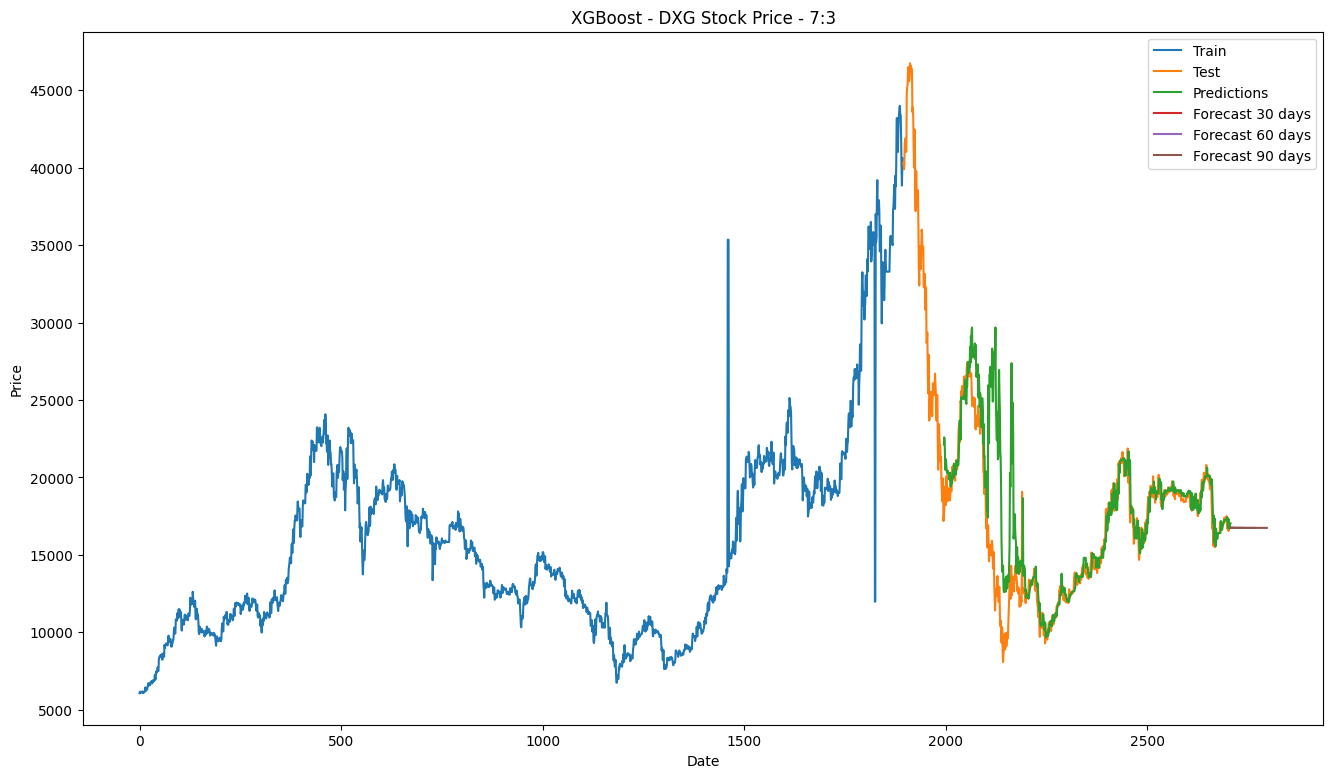

In [51]:
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_7_3, step=1)
plt.plot(scaler.inverse_transform(train_data_7_3))
test_data_index = pd.RangeIndex(start=train_size_7_3, stop=train_size_7_3+len(test_data_7_3), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_7_3))
predict_data_index = pd.RangeIndex(start=train_size_7_3 + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), step=1)
plt.plot(predict_data_index,y_pred_7_3)
forecast_data_30_index = pd.RangeIndex(start=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)) + len(forecast_30days_7_3), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_7_3).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)) + len(forecast_60days_7_3), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_7_3).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)) + len(forecast_90days_7_3), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_7_3).reshape(-1,1)))

plt.title('XGBoost - DXG Stock Price - 7:3')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [52]:
y_test_7_3 = y_test_7_3.reshape(-1,1)
y_test_7_3 = scaler.inverse_transform(y_test_7_3)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_7_3, y_pred_7_3))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_7_3, y_pred_7_3)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_7_3, y_pred_7_3)
print("MAPE:", mape)

RMSE: 2971.3440289579294
MAE: 1333.3926448750585
MAPE: 0.09406014340145487


## 8:2 ratio

In [53]:
model_8_2 = XGBRegressor(base_score=0.5,
                    booster='gbtree',
                    n_estimators=1500,
                    early_stopping_rounds=50,
                    objective='reg:squarederror',
                    max_depth=3,
                    learning_rate=0.01)

In [54]:
model_8_2.fit(x_train_8_2, y_train_8_2, eval_set=[(x_test_8_2, y_test_8_2)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
y_pred_8_2 = model_8_2.predict(x_test_8_2)
y_pred_8_2

array([0.1237032 , 0.11549114, 0.11532807, 0.11240627, 0.12131888,
       0.12088162, 0.12378017, 0.12574814, 0.12148196, 0.12172566,
       0.13424613, 0.13829048, 0.14030436, 0.14030436, 0.14298649,
       0.14034589, 0.14006063, 0.15504602, 0.15504602, 0.16239701,
       0.16015905, 0.16364281, 0.16015905, 0.16225123, 0.16246477,
       0.16467254, 0.16285427, 0.1647532 , 0.15481059, 0.1623017 ,
       0.15534021, 0.15510893, 0.16205798, 0.14836101, 0.14743766,
       0.14814748, 0.14814748, 0.14814748, 0.14820263, 0.14259332,
       0.14259332, 0.15488976, 0.15488976, 0.15361522, 0.15589078,
       0.15661287, 0.15639934, 0.15978926, 0.1600028 , 0.16028805,
       0.16028805, 0.16033639, 0.16028805, 0.16028805, 0.17297146,
       0.16763131, 0.18593587, 0.18850914, 0.18966979, 0.18212257,
       0.18212257, 0.18212257, 0.18690374, 0.18418615, 0.17448117,
       0.18207423, 0.18212257, 0.18212257, 0.18207423, 0.17724457,
       0.18207423, 0.18207423, 0.18966979, 0.18207423, 0.18885

In [56]:
#Forecast 30 days
forecast_30days_8_2 = forecast_future_days(model_8_2, test_data_8_2, time_step, 30)
#Predict 60 days
forecast_60days_8_2 = forecast_future_days(model_8_2, test_data_8_2, time_step, 60)
#Predict 90 days
forecast_90days_8_2 = forecast_future_days(model_8_2, test_data_8_2, time_step, 90)

0 day output [0.26121342]
1 day output [0.2587638]
2 day output [0.2570473]
3 day output [0.25446907]
4 day output [0.2515804]
5 day output [0.2515804]
6 day output [0.2515804]
7 day output [0.2515804]
8 day output [0.2515804]
9 day output [0.2515804]
10 day output [0.2515804]
11 day output [0.2515804]
12 day output [0.2515804]
13 day output [0.2515804]
14 day output [0.2515804]
15 day output [0.2515804]
16 day output [0.2515804]
17 day output [0.2515804]
18 day output [0.2515804]
19 day output [0.2515804]
20 day output [0.2515804]
21 day output [0.2515804]
22 day output [0.2515804]
23 day output [0.2515804]
24 day output [0.2515804]
25 day output [0.2515804]
26 day output [0.2515804]
27 day output [0.2515804]
28 day output [0.2515804]
29 day output [0.2515804]
0 day output [0.26121342]
1 day output [0.2587638]
2 day output [0.2570473]
3 day output [0.25446907]
4 day output [0.2515804]
5 day output [0.2515804]
6 day output [0.2515804]
7 day output [0.2515804]
8 day output [0.2515804]
9

In [57]:
y_pred_8_2 = scaler.inverse_transform(y_pred_8_2.reshape(-1,1))
y_pred_8_2

array([[11099.179 ],
       [10765.084 ],
       [10758.449 ],
       [10639.58  ],
       [11002.177 ],
       [10984.388 ],
       [11102.311 ],
       [11182.374 ],
       [11008.812 ],
       [11018.726 ],
       [11528.103 ],
       [11692.641 ],
       [11774.573 ],
       [11774.573 ],
       [11883.69  ],
       [11776.262 ],
       [11764.657 ],
       [12374.315 ],
       [12374.315 ],
       [12673.379 ],
       [12582.331 ],
       [12724.0625],
       [12582.331 ],
       [12667.448 ],
       [12676.136 ],
       [12765.955 ],
       [12691.981 ],
       [12769.237 ],
       [12364.736 ],
       [12669.501 ],
       [12386.283 ],
       [12376.875 ],
       [12659.586 ],
       [12102.345 ],
       [12064.78  ],
       [12093.658 ],
       [12093.658 ],
       [12093.658 ],
       [12095.902 ],
       [11867.696 ],
       [11867.696 ],
       [12367.958 ],
       [12367.958 ],
       [12316.1045],
       [12408.683 ],
       [12438.061 ],
       [12429.373 ],
       [12567

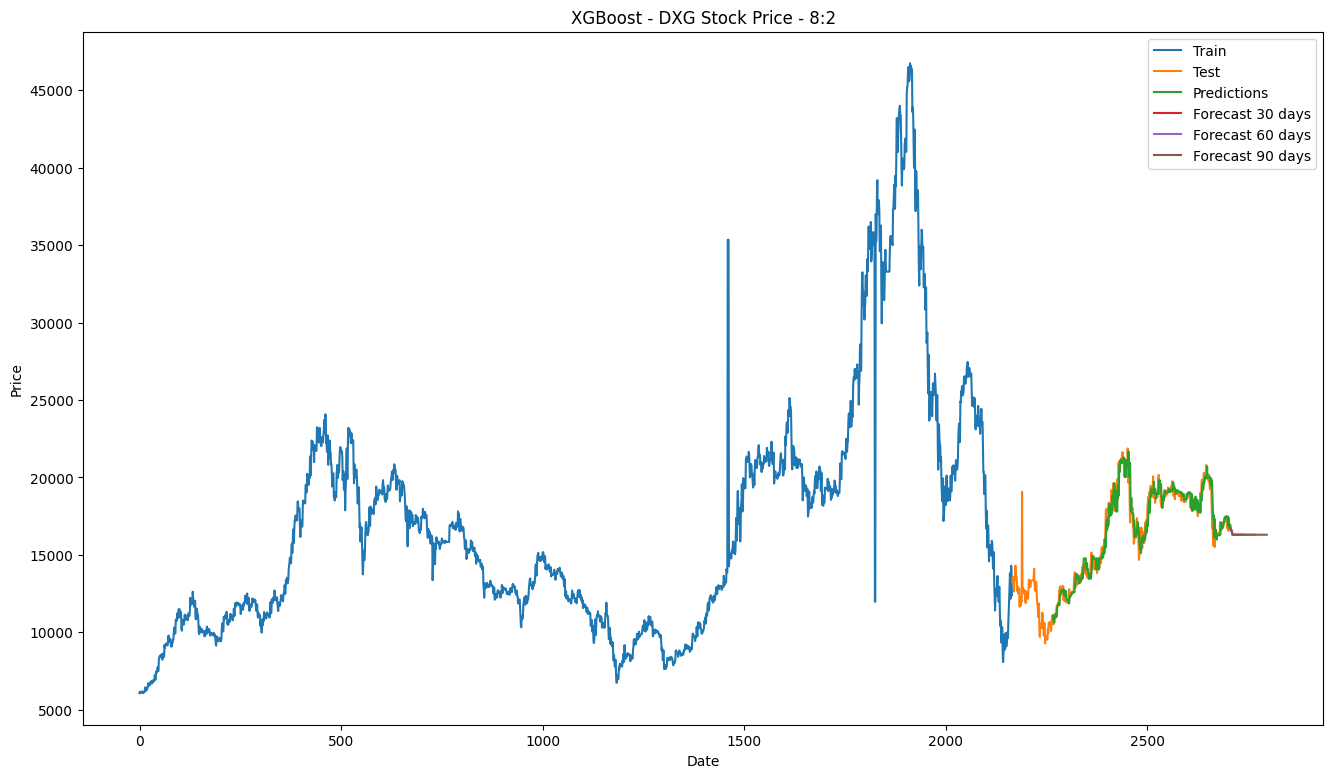

In [58]:
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_8_2, step=1)
plt.plot(scaler.inverse_transform(train_data_8_2))
test_data_index = pd.RangeIndex(start=train_size_8_2, stop=train_size_8_2+len(test_data_8_2), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_8_2))
predict_data_index = pd.RangeIndex(start=train_size_8_2 + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), step=1)
plt.plot(predict_data_index,y_pred_8_2)
forecast_data_30_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_30days_8_2), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_8_2).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_60days_8_2), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_8_2).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_90days_8_2), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_8_2).reshape(-1,1)))

plt.title('XGBoost - DXG Stock Price - 8:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [59]:
y_test_8_2 = y_test_8_2.reshape(-1,1)
y_test_8_2 = scaler.inverse_transform(y_test_8_2)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_8_2, y_pred_8_2))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_8_2, y_pred_8_2)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_8_2, y_pred_8_2)
print("MAPE:", mape)

RMSE: 506.08888798959265
MAE: 359.1249602879346
MAPE: 0.021467428993729328


## 9:1 ratio

In [60]:
model_9_1 = XGBRegressor(base_score=0.5,
                    booster='gbtree',
                    n_estimators=1500,
                    early_stopping_rounds=50,
                    objective='reg:squarederror',
                    max_depth=3,
                    learning_rate=0.01)

In [61]:
model_9_1.fit(x_train_9_1, y_train_9_1, eval_set=[(x_test_9_1, y_test_9_1)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [62]:
y_pred_9_1 = model_9_1.predict(x_test_9_1)
y_pred_9_1

array([0.29372004, 0.30509624, 0.31417286, 0.30509624, 0.3040645 ,
       0.31613326, 0.3168942 , 0.3188559 , 0.31970724, 0.31774554,
       0.31774554, 0.317165  , 0.31774554, 0.31774554, 0.31774554,
       0.31774554, 0.32456914, 0.31774554, 0.31774554, 0.31970724,
       0.31774554, 0.31970724, 0.31970724, 0.32456914, 0.31970724,
       0.31970724, 0.33364743, 0.33364743, 0.33004823, 0.32997495,
       0.32105273, 0.32456914, 0.3239886 , 0.31774554, 0.31774554,
       0.317165  , 0.31970724, 0.31774554, 0.31774554, 0.31774554,
       0.31970724, 0.31774554, 0.31774554, 0.31774554, 0.31774554,
       0.317165  , 0.31774554, 0.31774554, 0.31774554, 0.31273988,
       0.317165  , 0.31625393, 0.317165  , 0.317165  , 0.31273988,
       0.31273988, 0.31273988, 0.31273988, 0.31273988, 0.31273988,
       0.31273988, 0.317165  , 0.317165  , 0.317165  , 0.317165  ,
       0.317165  , 0.317165  , 0.31774554, 0.317165  , 0.317165  ,
       0.317165  , 0.31332043, 0.29372004, 0.317165  , 0.31520

In [63]:
#Forecast 30 days
forecast_30days_9_1 = forecast_future_days(model_9_1, test_data_9_1, time_step, 30)
#Predict 60 days
forecast_60days_9_1 = forecast_future_days(model_9_1, test_data_9_1, time_step, 60)
#Predict 90 days
forecast_90days_9_1 = forecast_future_days(model_9_1, test_data_9_1, time_step, 90)

0 day output [0.26078933]
1 day output [0.25976253]
2 day output [0.25877875]
3 day output [0.25877875]
4 day output [0.25877875]
5 day output [0.25877875]
6 day output [0.25877875]
7 day output [0.25877875]
8 day output [0.25877875]
9 day output [0.25877875]
10 day output [0.25877875]
11 day output [0.25877875]
12 day output [0.25877875]
13 day output [0.25877875]
14 day output [0.25877875]
15 day output [0.25877875]
16 day output [0.25877875]
17 day output [0.25877875]
18 day output [0.25877875]
19 day output [0.25877875]
20 day output [0.25877875]
21 day output [0.25877875]
22 day output [0.25877875]
23 day output [0.25877875]
24 day output [0.25877875]
25 day output [0.25877875]
26 day output [0.25877875]
27 day output [0.25877875]
28 day output [0.25877875]
29 day output [0.25877875]
0 day output [0.26078933]
1 day output [0.25976253]
2 day output [0.25877875]
3 day output [0.25877875]
4 day output [0.25877875]
5 day output [0.25877875]
6 day output [0.25877875]
7 day output [0.25

In [64]:
y_pred_9_1 = scaler.inverse_transform(y_pred_9_1.reshape(-1,1))
y_pred_9_1

array([[18016.06 ],
       [18478.883],
       [18848.152],
       [18478.883],
       [18436.908],
       [18927.908],
       [18958.865],
       [19038.676],
       [19073.31 ],
       [18993.502],
       [18993.502],
       [18969.883],
       [18993.502],
       [18993.502],
       [18993.502],
       [18993.502],
       [19271.11 ],
       [18993.502],
       [18993.502],
       [19073.31 ],
       [18993.502],
       [19073.31 ],
       [19073.31 ],
       [19271.11 ],
       [19073.31 ],
       [19073.31 ],
       [19640.445],
       [19640.445],
       [19494.018],
       [19491.037],
       [19128.049],
       [19271.11 ],
       [19247.49 ],
       [18993.502],
       [18993.502],
       [18969.883],
       [19073.31 ],
       [18993.502],
       [18993.502],
       [18993.502],
       [19073.31 ],
       [18993.502],
       [18993.502],
       [18993.502],
       [18993.502],
       [18969.883],
       [18993.502],
       [18993.502],
       [18993.502],
       [18789.854],


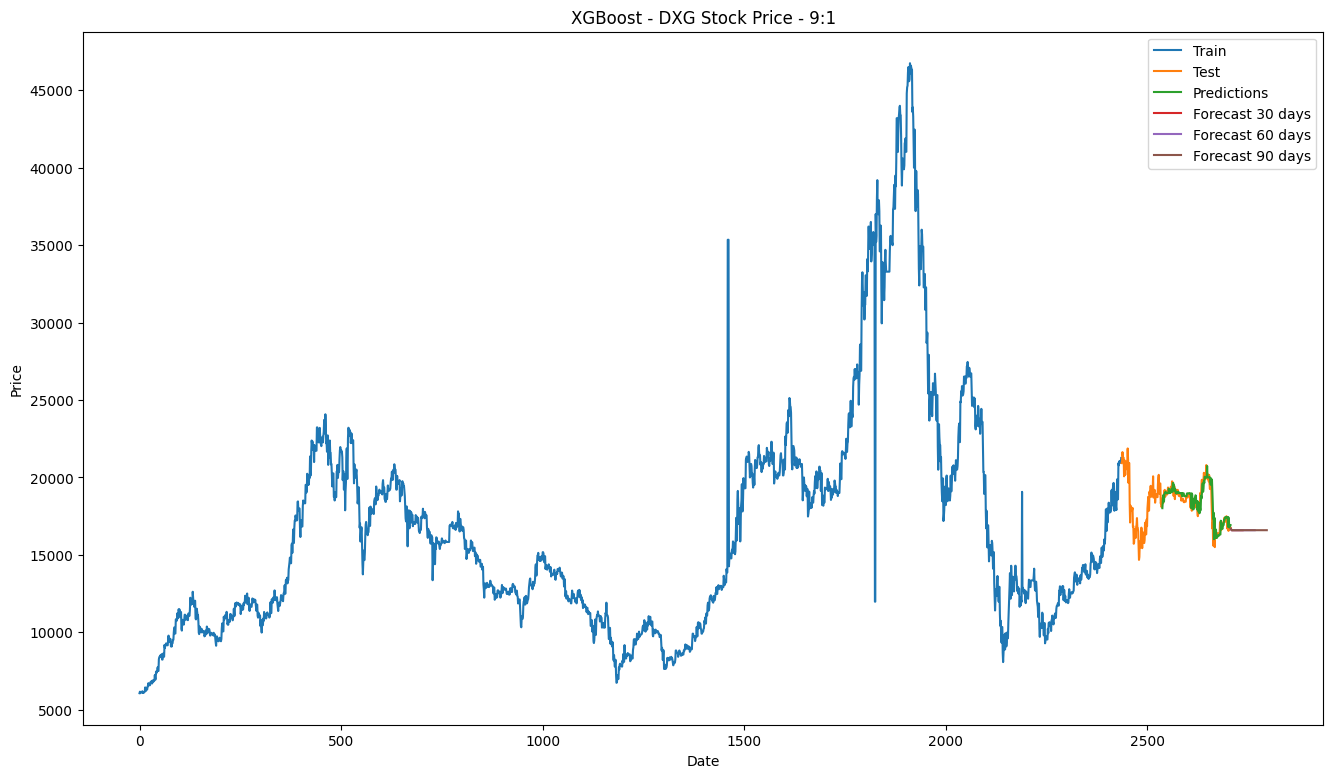

In [65]:
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_9_1, step=1)
plt.plot(scaler.inverse_transform(train_data_9_1))
test_data_index = pd.RangeIndex(start=train_size_9_1, stop=train_size_9_1+len(test_data_9_1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_9_1))
predict_data_index = pd.RangeIndex(start=train_size_9_1 + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), step=1)
plt.plot(predict_data_index,y_pred_9_1)
forecast_data_30_index = pd.RangeIndex(start=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)) + len(forecast_30days_9_1), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_9_1).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)) + len(forecast_60days_9_1), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_9_1).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)) + len(forecast_90days_9_1), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_9_1).reshape(-1,1)))

plt.title('XGBoost - DXG Stock Price - 9:1')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [66]:
y_test_9_1 = y_test_9_1.reshape(-1,1)
y_test_9_1 = scaler.inverse_transform(y_test_9_1)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_9_1, y_pred_9_1))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_9_1, y_pred_9_1)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_9_1, y_pred_9_1)
print("MAPE:", mape)

RMSE: 434.977297500265
MAE: 295.8660022212011
MAPE: 0.016393504118161942
